# 🔥 Torch Intro 🔥

## What is PyTorch?
PyTorch (or just torch) is a python deep learning library, by now getting widely adopted both in research and industry. Like most deep learning libraries it employs GPU accelaration; unlike most deep learning libraries, it supports dynamic computational graphs and deep python integration, enabling easy experimentation and code inspection. It provides high-level abstractions but also allows for low-level access to its primitives. You can read more about PyTorch at the official [site](https://pytorch.org/).

## Installing PyTorch on your machine
Install PyTorch by following the guidelines here [here](https://pytorch.org/get-started/locally/).

<div class="alert alert-block alert-info">
<b>Note:</b> If you have an nVidia GPU, installing a CUDA version of PyTorch will allow you to utilize it, significantly speeding up computation.
</div>

# This Tutorial
This tutorial will take you through PyTorch's main functionalities. It only aims to give you some insight on how to use PyTorch and is by no means a full tutorial on neural networks. Prior knowledge of neural netowrks and their inner workings (i.e. linear algebra, gradient-based optimization, back-propagation, etc.) will certainly prove useful. You are assumed to be largely fluent in python.

# Table of Contents
1. [Tensors](#1)
    1. [Tensor Types](#1a)
    2. [Instantiating Tensors](#1b)
    3. [Basic Tensor Operations](#1c)
    4. [Exercises](#1d)
2. [Automatic Differentation](#2)
    1. [Autograd](#2a)
    2. [Exercises](#2b)
3. [Neural Networks](#3)
    1. [Custom Neural Networks](#3a)
    2. [Loss Functions](#3b)
    3. [Optimizers](#3c)
    4. [Exercises](#3d)
4. [Putting Everything Together](#4)


For a more in-depth overview of PyTorch's capabilities, refer to the [official documentation](https://pytorch.org/docs/stable/index.html) (this link will prove handy for your assignments-- keep it close and use it often).

---

#### Getting started
Let's verify your torch installation is working by trying to import it.

In [2]:
import torch

<a id='1'></a>
## 1. Tensors

A [Tensor](https://pytorch.org/docs/stable/tensors.html) is the building block of any PyTorch program; it is the abstraction that stores n-ary arrays of numbers (i.e. tensors) and provides various functionalities for processing them. 

<a id='1a'></a>
### A. Tensor Types

There are 16 types of Tensors, distinguished by their `dtypes` (the sort of numbers stored within them) and the `device` they can be accessed by (either GPU or CPU).

The different Tensor types and their corresponding classes are shown below:

| Description | dtype | CPU Tensor Class | GPU Tensor Class |
| --- | --- | --- | --- |
| Full precision float | `torch.float32` | `torch.FloatTensor` | `torch.cuda.FloatTensor`| 
| Half precision float | `torch.float16` | `torch.HalfTensor` | `torch.cuda.HalfTensor` |
| Double precision float | `torch.float64` | `torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 8-bit unsigned integer | `torch.uint8` | `torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit signed integer | `torch.int8` | `torch.CharTensor` | `torch.CharTensor` |
| 16-bit signed integer | `torch.int16` | `torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit signed integer | `torch.int32` | `torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit signed integer | `torch.int64` | `torch.LongTensor` | `torch.cuda.LongTensor` |

<div class="alert alert-block alert-warning">
<b>Warning:</b>
Interaction between Tensors of different devices or dtypes is not permitted (so make sure you are consistent). 
</div>

We are mostly interested in full precision floats and long integers (on either device), so we can forget about the rest of them for now.

For the sake of convenience, we will now specify the device used by the rest of the tutorial. If you have the cuda version installed but would rather not use it, change the snippet below.

In [4]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

print("Using {}".format(device))

Using cpu


<a id='1b'></a>
### B. Instantiating Tensors
Tensors can be instantiated in a number of ways. When we want to construct a tensor of fixed dimensionality (shape) with random values, we may simply call the appropriate class constructor with the desired dimensionality as the argument.

In [3]:
my_first_long_tensor = torch.LongTensor(5)  # a vector of 5 longs
print(my_first_long_tensor.shape)
print(my_first_long_tensor.dtype)
print(my_first_long_tensor)

torch.Size([5])
torch.int64
tensor([                  0,                   0,                   0,
        8319683848551211643, 3180222411935070754])


In [4]:
my_first_float_tensor = torch.FloatTensor(5, 5)  # a 5 by 5 matrix of floats
print(my_first_float_tensor.shape)
print(my_first_float_tensor.dtype)
print(my_first_float_tensor)

torch.Size([5, 5])
torch.float32
tensor([[1.0838e-08, 2.6260e-06, 1.6504e-07, 1.2399e+16, 2.1707e-18],
        [7.0952e+22, 1.7748e+28, 1.8176e+31, 7.2708e+31, 5.0778e+31],
        [3.2608e-12, 1.7728e+28, 7.0367e+22, 2.1715e-18, 4.1946e+21],
        [1.0675e-08, 2.1084e-07, 1.0488e-08, 1.6536e-04, 1.0471e-11],
        [2.6705e+23, 1.7662e-04, 8.4944e+20, 2.1707e-18, 7.1450e+31]])


There are some useful shorthands for constructing tensors with commonly used values. Let's use some of them.

In [5]:
a = torch.zeros((2, 3, 4))  # a 2 by 3 by 4 tensor of zeros
b = torch.ones(42)  # a vector of 42 ones
c = torch.eye(3)  # a 3 by 3 identity matrix
d = torch.rand((32, 10, 300))  # a 32 by 10 by 300 tensor of randoms
e = torch.randint(low=0, high=10, size=(3, 3))  # a 3 by 3 matrix of random integers between 0 (incl.) and 10 (excl.)
f = torch.arange(10)  # a vector containing the numbers 0 to 9 in ascending order

e

tensor([[2, 9, 6],
        [4, 7, 8],
        [5, 0, 2]])

We can explicitly set the `dtype` and `device` arguments to specify the tensor's type and device (most often these default to torch.float and cpu).

In [6]:
a_long = torch.zeros((2, 3, 4), dtype=torch.long, device=device)
f_float = torch.arange(10, dtype=torch.float, device=device)

We can always query a tensor's contents, shape, dtype and device.

In [7]:
for te in [a, a_long, b, c, d, e, f, f_float]:
    print(te.shape)
    print(te.dtype)
    print(te.device)
    print(f"check: {te}")
    print()

torch.Size([2, 3, 4])
torch.float32
cpu
check: tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

torch.Size([2, 3, 4])
torch.int64
cpu
check: tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

torch.Size([42])
torch.float32
cpu
check: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.])

torch.Size([3, 3])
torch.float32
cpu
check: tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

torch.Size([32, 10, 300])
torch.float32
cpu
check: tensor([[[0.5889, 0.7656, 0.3175,  ..., 0.3641, 0.8456, 0.7773],
         [0.0042, 0.2048, 0.4194,  ..., 0.1706, 0.4415, 0.6417],
         [0.0917, 0.5632, 0.6337,  ..., 0.2769, 0.2299, 0.3481],
    

We can create a tensor with the same size as an already existing one.

In [8]:
d = torch.rand((32, 10, 300))

like_d_rand = torch.rand_like(d) # a 32 by 10 by 300 tensor of random values
print(like_d_rand.shape)

like_d_ones = torch.ones_like(d) # a 32 by 10 by 300 tensor of ones 
print(like_d_ones.shape)

like_d_zeros = torch.zeros_like(d) # a 32 by 10 by 300 tensor of zeros
print(like_d_zeros.shape)

torch.Size([32, 10, 300])
torch.Size([32, 10, 300])
torch.Size([32, 10, 300])


We can also specify the values of a tensor by passing a list (of lists*) of values during its construction.

In [9]:
a = torch.tensor([[1,2,3], [4,5,6], [7,8,9]], device=device)
print(a)
print(a.shape)
print(a.dtype)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.Size([3, 3])
torch.int64


Notice that PyTorch automatically assumed that the tensor we specified should be of type long (because we only provided integers as the tensor's contents). We could of course avoid this by manually specifying the dtype. Alternatively, we can alter the dtype and/or device post-construction.

In [10]:
print(a.dtype)
a = a.to(torch.float)
print(a.dtype)
a = a.to("cpu")  # or alternatively, a = a.cpu()
print(a.device)

torch.int64
torch.float32
cpu


Finally, a torch tensor can also be directy constructed by (or converted to) a numpy array. Converting to a numpy array only works for cpu tensors.

In [11]:
import numpy as np
a_np = np.random.random((2, 2))
a_torch = torch.tensor(a_np, device=device)
print(a_np)
print()
print(a_torch)
print()
a_np_2 = a_torch.cpu().numpy() # to ask why do we do this operation if the tenser is already on the cpu? Or did not i underdstand that correctly!
print(a_np_2)

[[0.16289442 0.90387473]
 [0.60027065 0.15380306]]

tensor([[0.1629, 0.9039],
        [0.6003, 0.1538]], dtype=torch.float64)

[[0.16289442 0.90387473]
 [0.60027065 0.15380306]]


In [12]:
del (
    my_first_long_tensor, my_first_float_tensor, a, b, c, d, e, f, a_long, 
    f_float, like_d_rand, like_d_ones, like_d_zeros, a_np, a_torch, a_np_2
)

<a id='1c'></a>
### C. Basic Tensor Operations
Tensors and their contents are not hidden by the framework -- they are immediatelly accessible to us and we can interact with them in many ways, while being able to inspect the results of our actions. Let's walk through some of the most common usecases.

#### Indexing and Slicing
Standard python indexing and slicing applies to torch tensors. Let's remember how that works -- first we will need a random matrix to experiment with.

In [13]:
a = torch.rand((5, 3), device=device)  
print(a)

tensor([[0.7891, 0.0090, 0.5989],
        [0.6931, 0.5501, 0.8272],
        [0.8719, 0.9228, 0.1525],
        [0.5907, 0.8594, 0.4941],
        [0.8607, 0.9456, 0.5137]])


<div class="alert alert-block alert-warning">
<b>Remember!</b>
Indexing starts from zero
</div>

Now let's try retrieving the 3rd item of the 1st row.

In [14]:
b = a[0][2]
print(b)

tensor(0.5989)


Note that even though it's just one element, it's still a tensor and not a float value. In order to get the value itself, we can call `item()`.

In [15]:
print(type(b) is float)
print(type(b.item()) is float)
b.item()

False
True


0.598875880241394

What if we wanted the first three rows of the matrix instead?

In [16]:
c = a[:3]
print(c)

tensor([[0.7891, 0.0090, 0.5989],
        [0.6931, 0.5501, 0.8272],
        [0.8719, 0.9228, 0.1525]])


Or its third column?

In [17]:
c = a[:, 2]
print(c)

tensor([0.5989, 0.8272, 0.1525, 0.4941, 0.5137])


Or every second element of the first column, starting from the second?

In [18]:
c = a[1::3, 0]
print(c)

tensor([0.6931, 0.8607])


But now in reverse, starting from the last?!

In [19]:
c = a[-1::-2, 0]
print(c)

ValueError: negative step not yet supported

Well, perhaps not...

We can also select the maximum element from the tensor with `argmax` or the top K elements with `topk`.

In [20]:
print(a)
print(a.argmax(dim=1)) # returns the indices of the maximum values across the specified dimension
print()
print(a.topk(dim=1, k=3))# returns both the indices and the values of the top K elements

lll = (a.topk(dim=1, k=3)[1])
lll[1:,2]


tensor([[0.7891, 0.0090, 0.5989],
        [0.6931, 0.5501, 0.8272],
        [0.8719, 0.9228, 0.1525],
        [0.5907, 0.8594, 0.4941],
        [0.8607, 0.9456, 0.5137]])
tensor([0, 2, 1, 1, 1])

torch.return_types.topk(
values=tensor([[0.7891, 0.5989, 0.0090],
        [0.8272, 0.6931, 0.5501],
        [0.9228, 0.8719, 0.1525],
        [0.8594, 0.5907, 0.4941],
        [0.9456, 0.8607, 0.5137]]),
indices=tensor([[0, 2, 1],
        [2, 0, 1],
        [1, 0, 2],
        [1, 0, 2],
        [1, 0, 2]]))


tensor([1, 2, 2, 2])

#### Value Assignment
We can use the exact same scheme to assign values to tensors.

In [21]:
# Set the top left item of the matrix to zero.
a[0,0] = 0
print(a)
print()
# Construct another random matrix of the same shape.
b = torch.rand_like(a, device=device)
print(b)
print()
# Set the second row of matrix a to be the third row of matrix b.
a[1] = b[2]
print(a)

tensor([[0.0000, 0.0090, 0.5989],
        [0.6931, 0.5501, 0.8272],
        [0.8719, 0.9228, 0.1525],
        [0.5907, 0.8594, 0.4941],
        [0.8607, 0.9456, 0.5137]])

tensor([[0.6817, 0.2824, 0.6594],
        [0.6588, 0.0807, 0.3460],
        [0.8400, 0.3421, 0.7408],
        [0.7074, 0.1815, 0.0544],
        [0.2658, 0.8933, 0.5040]])

tensor([[0.0000, 0.0090, 0.5989],
        [0.8400, 0.3421, 0.7408],
        [0.8719, 0.9228, 0.1525],
        [0.5907, 0.8594, 0.4941],
        [0.8607, 0.9456, 0.5137]])


#### Elementwise Arithmetic
Elementwise operations (most importantly comparison, addition, subtraction, multiplication and division) can be applied on tensors of compatible shapes (i.e. shapes that can be [broadcasted](https://pytorch.org/docs/stable/notes/broadcasting.html)). 

Two tensors are compatible if any of the two below conditions hold:
* their shapes are the same 
* their trailing (i.e. last) N dimensions are the same (excluding missing dimensions and dimensions of size 1)

Scalars (single values) are compatible with tensors of any shape. Let's see some examples.

First, some fresh tensors.

In [22]:
a = torch.zeros((2, 3, 4), device=device)  
b = torch.ones((2, 3, 4), device=device)  
c = torch.ones((3, 4), device=device)  
d = torch.ones((2, 3, 1), device=device)
e = torch.rand((4, 3, 2), device=device)

We can add a scalar to tensor $a$ 

In [23]:
print(a)
a = a + 0.3
print(a.shape)
print(a)


tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
torch.Size([2, 3, 4])
tensor([[[0.3000, 0.3000, 0.3000, 0.3000],
         [0.3000, 0.3000, 0.3000, 0.3000],
         [0.3000, 0.3000, 0.3000, 0.3000]],

        [[0.3000, 0.3000, 0.3000, 0.3000],
         [0.3000, 0.3000, 0.3000, 0.3000],
         [0.3000, 0.3000, 0.3000, 0.3000]]])


We can subtract $b$ from $a$ (matching shapes)

In [24]:

f = a - b
print(f.shape)
print(f)

torch.Size([2, 3, 4])
tensor([[[-0.7000, -0.7000, -0.7000, -0.7000],
         [-0.7000, -0.7000, -0.7000, -0.7000],
         [-0.7000, -0.7000, -0.7000, -0.7000]],

        [[-0.7000, -0.7000, -0.7000, -0.7000],
         [-0.7000, -0.7000, -0.7000, -0.7000],
         [-0.7000, -0.7000, -0.7000, -0.7000]]])


We can elementwise multiply $a$ with $c$ (dimensions of $c$ are the same as the last dimensions of $a$)

In [25]:
print(c)
print(g)
g =  a * c
print(g.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


NameError: name 'g' is not defined

We can elementwise divide $a$ by $d$ (the last dimension of $d$ is 1, the rest of the dimensions match)

In [26]:
h = a / d
print(h.shape)

torch.Size([2, 3, 4])


We can elementwise raise $a$ to $d$ (the last dimension of $d$ is 1, the rest of the dimensions match)

In [27]:
i = a**d
print(i.shape)

torch.Size([2, 3, 4])


And we can compare $a$ with any of $f$, $g$, $h$

In [28]:
j = a == f
print(j.shape)

torch.Size([2, 3, 4])


.. but torch complains when we try to do that with $e$ (the shapes are incompatible)

In [29]:
e == a

RuntimeError: The size of tensor a (2) must match the size of tensor b (4) at non-singleton dimension 2

If in doubt for what any of the elementwise operators actually do, try them out below on some tensors of your own making.

A convenient shortcut for a particular sequence of elementwise operations is `torch.where`. Given two tensors $x$ and $y$ and a boolean tensor $condition$, it compiles a new tensor selecting the elements from either $x$ or $y$, depending on $condition$.

In [30]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
print(x)
print(y)
condition = torch.tensor([[True, False], [False, True]])
z = torch.where(condition, x, y)
z

tensor([[0.3836, 0.3676],
        [0.9923, 0.2702]])
tensor([[0.7856, 0.7579],
        [0.7896, 0.3233]])


tensor([[0.3836, 0.7579],
        [0.7896, 0.2702]])

In [31]:
del a, b, c, d, e, f, g, h, i, j, x, y, z, condition

NameError: name 'g' is not defined

#### Linear Algebra
Tensor algebra of course goes well beyond elementwise operations -- matrix multiplication is the bread and butter of machine learning, so we better get familiar with how torch does it.

As usual, we begin by instantiating our matrices. Matrix multiplication is defined between matrices A and B of shapes [M, N] and [N, O] respectively and yields a matrix C of shape [M, O]. The torch function that implements matrix multiplication is `torch.mm`.

In [32]:
A = torch.rand([5, 3], device=device)
B = torch.rand([3, 8], device=device)
C = torch.mm(A, B)  # or alternatively, C = A @ B
print(C.shape)

torch.Size([5, 8])


What if we had several matrices (i.e. a batch of matrices) to each be multiplied with a matching B? We can use `torch.bmm` for efficient batch matrix multiplication.

<div class="alert alert-block alert-info">
<b>Tip:</b> Rather than writing slow and ugly `for` loops, employ array programming to write your machine learning code. This will make it much more concise and dramatically more efficient.
</div>

In [33]:
bA = torch.rand([128, 4, 3], device=device)
bB = torch.rand([128, 3, 8], device=device)
print(bA.shape,bB.shape)
bC = torch.bmm( bA,bB )  # bC = bA @ bC also works here!      #ask
print(bC.shape)

torch.Size([128, 4, 3]) torch.Size([128, 3, 8])
torch.Size([128, 4, 8])


<div class="alert alert-block alert-warning">
<b>Warning:</b>
Be careful not to confuse matrix multiplication `A@B` with the <a href="https://en.wikipedia.org/wiki/Hadamard_product_%28matrices%29">Hadamard product</a> `A*B`
</div>

#### Shape Manipulation
As we have seen, what we can do with tensors is largely dictated by their shapes. Adjusting a tensor's shape to allow for broadcasting or batching is therefore often necessary. The following functions should suffice for the bulk of shape manipulation tasks you might encounter.

Tensor tansposition is the generalization of matrix transposition. Since there are now more than 2 dimensions, we additionally need to specify the transposed dimensions. Take for instance a tensor of shape [M, N, O]. Converting it to a tensor of shape [N, M, O] requires transposing the first and second dimensions.

In [34]:
A = torch.rand([128, 5, 3], device=device)
A = A.transpose(0, 1)

print(A.shape)

torch.Size([5, 128, 3])


A generalization of transposing is permutation of the tensor's dimensions. In calling `permute`, we must provide the new order of all the dimensions.

In [35]:
A = torch.rand([128, 5, 3], device=device)
A = A.permute(2, 0, 1)
print(A.shape)
A = A.permute(2, 0, 1)
print(A.shape)

torch.Size([3, 128, 5])
torch.Size([5, 3, 128])


We may also choose to create a reshaped view of a tensor; for instance we may collapse two or more tensor dimensions into one...

In [116]:
A = torch.rand([128, 5, 3], device=device)
print(A.shape)
A_collapsed = A.view(A.shape[0]*A.shape[1], A.shape[-1])
print(A_collapsed.shape)


torch.Size([128, 5, 3])
torch.Size([640, 3])


... or expand one dimension into two or more.

In [117]:
A_expanded = A_collapsed.view(128, 5, 3)
print(A_expanded.shape)

torch.Size([128, 5, 3])


Let's convince ourselves that the back and forth between dimensions has left our tensor unaffected. First let's elementwise compare A with A_expanded.

In [60]:
comp = A == A_expanded
print(comp)

NameError: name 'A_expanded' is not defined

It seems to be okay! But what if there is a False somewhere in there? Python's `all` and `any` may be used directly on torch bools to help us here.

In [39]:
all([all(row) for matrix in comp for row in matrix])

True

Views are useful, but as the name suggests they only change our view of a tensor. Different views of a tensor have the same number of elements; the view is just changing in what order these are read.

For cases where we would like to repeat a tensor across one or more of its axes (actually creating a larger tensor), we can use the function of the same name. Let's consider a tensor of shape [M, N] which we would like to turn into a tensor that repeats itself K times across the first dimension (i.e. a tensor of shape [K $\cdot$ M, N].

In [40]:
A = torch.rand([5, 12], device=device)
A_repeat = A.repeat(3, 1)  # note that we are specifying the number of repeats per dimension
print(A_repeat.shape)
print(A_repeat)
print(A)

torch.Size([15, 12])
tensor([[0.9250, 0.4962, 0.6216, 0.5063, 0.4031, 0.9193, 0.5902, 0.6714, 0.8323,
         0.9468, 0.8555, 0.6757],
        [0.8242, 0.5906, 0.6405, 0.3573, 0.7347, 0.8943, 0.7677, 0.2779, 0.1395,
         0.0281, 0.6128, 0.7515],
        [0.2172, 0.8653, 0.4168, 0.8704, 0.9251, 0.3468, 0.1333, 0.5982, 0.3694,
         0.0907, 0.3362, 0.7730],
        [0.0823, 0.9735, 0.9898, 0.3300, 0.6098, 0.7148, 0.7882, 0.8168, 0.1203,
         0.8091, 0.5796, 0.7620],
        [0.6016, 0.0725, 0.3296, 0.3030, 0.0517, 0.9092, 0.7275, 0.9383, 0.7954,
         0.0647, 0.1742, 0.1641],
        [0.9250, 0.4962, 0.6216, 0.5063, 0.4031, 0.9193, 0.5902, 0.6714, 0.8323,
         0.9468, 0.8555, 0.6757],
        [0.8242, 0.5906, 0.6405, 0.3573, 0.7347, 0.8943, 0.7677, 0.2779, 0.1395,
         0.0281, 0.6128, 0.7515],
        [0.2172, 0.8653, 0.4168, 0.8704, 0.9251, 0.3468, 0.1333, 0.5982, 0.3694,
         0.0907, 0.3362, 0.7730],
        [0.0823, 0.9735, 0.9898, 0.3300, 0.6098, 0.7148, 0.

If you need to repeat a singleton dimension (i.e. a dimension of size 1), you can do that with the `expand` function which can be more efficient for large tensors since it does not allocate new memory.

In [41]:
A = torch.rand([1, 12], device=device)
A_exp = A.expand(15, 12)  # note that we are specifying the expected dimensions of the new tensor
print(A_exp.shape)
#
A = torch.rand([1, 12], device=device)
A_exp = A.expand(15, -1)  # -1 means not changing the size of that dimension
print(A_exp.shape)

torch.Size([15, 12])
torch.Size([15, 12])


Another convenient pair of functions is `squeeze`-`unsqueeze`. 

`squeeze` removes all the dimensions of size 1, or a specific dimension of size 1 if it's specified in the `dim` parameter.

In [51]:
A = torch.rand([1, 12, 1], device=device)
print(A.shape)

A_squeezed = A.squeeze()
print(A_squeezed.shape)

A_squeezed_first = A.squeeze(dim=0)
print(A_squeezed_first.shape)

torch.Size([1, 12, 1])
torch.Size([12])
torch.Size([12, 1])


Conversely, `unsqueeze` inserts a new dimension of size 1 into a specified position.

In [43]:
A = torch.rand([2, 12], device=device)
print(A.shape)

A_unsqueezed = A.unsqueeze(2)
print(A_unsqueezed.shape)

torch.Size([2, 12])
torch.Size([2, 12, 1])


#### Combining Tensors
Sometimes we may want to construct a big tensor out of two small ones. There's a few ways to accomplish that, but the most reliable one is through `torch.cat` 🐈 (shorthand for concatenate).

Two tensors may be concatenated if they agree on all their dimensions, except for the concatenation dimension.

In [44]:
A = torch.rand([4, 2], device=device)
B = torch.rand([1, 2], device=device)
C = torch.cat((A, B), dim=0)
print(C.shape)

torch.Size([5, 2])


In [45]:
del (
    A, B, C, comp, A_repeat, A_exp, A_expanded, A_collapsed, A_squeezed, 
    A_squeezed_first, A_unsqueezed, bA, bB, bC
)

---

<a id='1d'></a>
### Exercises
It might be a good idea to take a short break here and recap on what we've seen before moving further. The mini-exercises below should help you test your grasp of this section.

Construct a tensor $A$ of shape [10, 10] containing random floats, and a tensor $B$ of the same shape where all its elements are equal to $\pi$.

In [123]:
A = torch.rand((10,10))
B = torch.rand_like(A, device=device)

Compute $C = AB^T$, the matrix multiplication of $A$ with the transpose of $B$ and $D = A\cdot B$, their elementwise multiplication.

In [124]:
C = torch.mm(A, B.T)
print(C)
D = torch.mm(A, B)



tensor([[1.5551, 1.8299, 1.3478, 1.8049, 1.7426, 2.0382, 2.2372, 1.0431, 1.8549,
         2.3641],
        [2.2552, 2.6062, 2.0709, 2.8311, 2.8569, 2.5139, 2.5392, 0.9714, 2.2843,
         2.3037],
        [1.5416, 2.1510, 1.5937, 2.8922, 2.4077, 3.2913, 2.5371, 2.1680, 2.5803,
         3.0463],
        [2.2220, 3.0421, 1.7801, 3.1187, 2.8559, 2.6495, 2.7335, 1.6468, 2.1658,
         2.6851],
        [2.1989, 2.0832, 2.0296, 2.9483, 2.6657, 2.9316, 3.0076, 1.5508, 2.7463,
         2.8116],
        [1.5368, 1.3425, 1.2120, 1.7255, 1.5706, 2.4763, 1.9994, 1.4454, 2.2863,
         2.2775],
        [1.5076, 1.9979, 1.2281, 1.6140, 1.9881, 2.1052, 2.0026, 1.1361, 2.2138,
         2.4553],
        [2.6290, 2.6740, 1.8061, 2.8248, 2.8778, 2.7963, 2.8815, 1.8759, 2.9212,
         2.8366],
        [2.0455, 2.6494, 1.7761, 2.4662, 2.7790, 2.3321, 2.5239, 1.5861, 2.5245,
         2.7591],
        [1.9383, 2.2255, 1.7010, 2.3685, 2.6748, 2.2223, 2.3388, 1.1601, 2.2233,
         1.9386]])


Try comparing $C$ with $D$. Are they comparable? Are they equal? What is the dtype of their comparison?

In [125]:
queal = C ==D
print(queal)

tensor([[False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False]])


Multiply $A$ by 4 to create $F$. Now set all elements of $F$ that are above $\pi$ to zero.


_Hint 1_: You can index a tensor with a boolean tensor of the same dimensionality

_Hint 2_: You can set multiple indexed elements to a single value at once

In [126]:
mul = torch.zeros(1,C.shape[1])
print(mul)
mul = mul+ 4
print(mul)
F = torch.mm(A, mul.T)

print(F * F)
print(F)
#F[NotImplemented] = 0
F[F>20] =0
print(F)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]])
tensor([[242.0261],
        [376.3474],
        [464.1046],
        [463.8943],
        [444.4234],
        [244.1459],
        [277.1214],
        [486.4927],
        [393.1060],
        [356.4992]])
tensor([[15.5572],
        [19.3997],
        [21.5431],
        [21.5382],
        [21.0814],
        [15.6252],
        [16.6470],
        [22.0566],
        [19.8269],
        [18.8812]])
tensor([[15.5572],
        [19.3997],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [15.6252],
        [16.6470],
        [ 0.0000],
        [19.8269],
        [18.8812]])


The incomplete function below implements matrix multiplication with a for loop. Complete the function and call it with your $A$ and $B^T$ matrices as its arguments. The result should be the same as the matrix $C$ you computed before (with room for some numerical inaccuraccy)

Note: You can use `torch.sum()` to compute the sum of a tensor (optionally specifying across which dimension)

<div class="alert alert-block alert-info">
<b>Note:</b> <a href="https://www.python.org/dev/peps/pep-0484/#rationale-and-goals">Type Hints</a> may be used in python function and variable declarations to give them a type signature. These type signatures are not strict (you can still bypass them), but they can help you organize your code. Type hints of incomplete functions given during assignments will inform you of what we expect your function to accept and return.
</div>

In [127]:
def my_mm(A: torch.FloatTensor, B: torch.FloatTensor) -> torch.FloatTensor:
    assert A.shape[1] == B.shape[0]
    assert (len(A.shape) == len(B.shape) == 2)
    C = torch.zeros((A.shape[0], B.shape[1]), device=device)
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            C[i,j] = torch.sum(A[i] * B[:,j])
    return C
    
    
    
E = my_mm(A, B.transpose(1, 0))
print(E)
# Make sure the mean absolute difference between the two results is below 0.0001.
assert torch.sum(torch.abs(E - C))/(E.shape[0]*E.shape[1]) < 1e-4 

tensor([[1.5551, 1.8299, 1.3478, 1.8049, 1.7426, 2.0382, 2.2372, 1.0431, 1.8549,
         2.3641],
        [2.2552, 2.6062, 2.0709, 2.8311, 2.8569, 2.5139, 2.5392, 0.9714, 2.2843,
         2.3037],
        [1.5416, 2.1510, 1.5937, 2.8922, 2.4077, 3.2913, 2.5371, 2.1680, 2.5803,
         3.0463],
        [2.2220, 3.0421, 1.7801, 3.1187, 2.8559, 2.6495, 2.7335, 1.6468, 2.1658,
         2.6851],
        [2.1989, 2.0832, 2.0296, 2.9483, 2.6657, 2.9316, 3.0076, 1.5508, 2.7463,
         2.8116],
        [1.5368, 1.3425, 1.2120, 1.7255, 1.5706, 2.4763, 1.9994, 1.4454, 2.2863,
         2.2775],
        [1.5076, 1.9979, 1.2281, 1.6140, 1.9881, 2.1052, 2.0026, 1.1361, 2.2138,
         2.4553],
        [2.6290, 2.6740, 1.8061, 2.8248, 2.8778, 2.7963, 2.8815, 1.8759, 2.9212,
         2.8366],
        [2.0455, 2.6494, 1.7761, 2.4662, 2.7790, 2.3321, 2.5239, 1.5861, 2.5245,
         2.7591],
        [1.9383, 2.2255, 1.7010, 2.3685, 2.6748, 2.2223, 2.3388, 1.1601, 2.2233,
         1.9386]])


Create a 2-dimensional tensor $S$ that consists of an instance of $A$ followed by two instances of $B$ followed by an instance of $A$ across its first dimension. What is the shape of $S$?

In [128]:
S = torch.cat([A,B,B,A], dim =0)
print(S.shape)

torch.Size([40, 10])


Reshape $S$ into a tensor of shape [20, 2, 10]. 
Then transpose this into a tensor of shape [2, 10, 20].

In [132]:
print(S.shape)
S = (S.unsqueeze(0).reshape(20, 2, 10))
print(S.shape)

S = S.transpose(0, 1)
print(S.shape)

torch.Size([10, 40])
torch.Size([20, 2, 10])
torch.Size([2, 20, 10])


In [122]:
del A, B, C, D, E, F, S

---

<a id='2'></a>
## 2. Automatic Differentation and Neural Networks
We have so far seen some of torch's computational capabilities; its GPU accelaration and multitude of high level functions make it suitable for array processing and vector arithmetic. But torch is more than a faster numpy; its key components, and where most of the magic happens, are in its automatic differentiation mechanics and neural network libraries.

<a id='2a'></a>
### A. Autograd
Each torch tensor carries a flag around with it, `requires_grad`, which establishes whether that tensor requires gradient computation. 

By default, tensors do not require grad unless specified to. Whenever a tensor that requires grad assumes a role in the construction of another tensor, the new tensor also requires grad.
By dynamically tracking dependencies in the evolving computation graph, and utilizing this flag, torch is able to inform itself on which tensors need to be updated by gradient descent, and which do not (naturally, only tensors for which gradients are computed will be updated).

Practically, by setting `requires_grad` to `False` we can _freeze_ (parts of) our functions, making them static.

Let's see this in action by modeling a simple linear transformation $f(x): Ax$ from $x \in \mathbb{R}^5$  to $y \in \mathbb{R}^7$:

<div class="alert alert-block alert-info">
<b>Note:</b> Recall that a matrix of shape [M, N] is a linear map <em>from</em> $\mathbb{R}^N$ <em>to</em> $\mathbb{R}^M$.
</div>

In [138]:
A = torch.rand((7, 5), device=device) 
A.requires_grad = True
def f(x: torch.FloatTensor) -> torch.FloatTensor:
    return A@x 

Let's test our function for some $x$, and check whether the result requires grad.

In [139]:
x = torch.rand(5, device=device)
y = f(x)
print(y)
print(y.requires_grad)

tensor([0.4399, 1.1088, 0.5398, 0.9985, 1.0679, 0.9527, 0.8299],
       grad_fn=<MvBackward>)
True


It does not; what if the parameters of our function $f$ were trainable though?

In [148]:
wwww = torch.tensor([[[1,2,3,4,5,6]]])
print(wwww)
wwww.shape



tensor([[[1, 2, 3, 4, 5, 6]]])


torch.Size([1, 1, 6])

In [ ]:
A.requires_grad = True
y = f(x)
print(y.requires_grad)

The output of our linear transformation is now also trainable!


---

<a id='2b'></a>
### Exercises

Model an affine transformation 𝑔(𝑥)=𝐴𝑥+𝛽g(x)=Ax+β \\
from 𝑥∈ℝ3x∈R3 to 𝑦∈ℝ12y∈R12 as the composition of two functions, 
𝑓1(𝑥)=𝐴𝑥f1(x)=Ax, 𝑓2(𝑥)=𝑥+𝛽f2(x)=x+β, such that 𝐴A requires grad but 𝛽β does not.
Answer the next questions before you proceed.

Model an affine transformation $g(x) = Ax + \beta$ from $x \in \mathbb{R}^3$ to $y \in \mathbb{R}^{12}$ as the composition of two functions, $f_1(x) = Ax$, $f_2(x) = x + \beta$, such that $A$ requires grad but $\beta$ does not.

<div class="alert alert-block alert-info">
<b>Note:</b> You can use `requires_grad: bool` as an optional argument during tensor construction. Can you guess its default value?
</div>

In [158]:
A = torch.rand((12,3), device=device) 
print(A)
A.requires_grad = True

beta = torch.rand(12, 1, device=device) 


#multi
def f_1(x: torch.FloatTensor) -> torch.FloatTensor:
    
    return A @ x

# addition
def f_2(x: torch.FloatTensor) -> torch.FloatTensor:
    return x + beta
    
    return NotImplemented

x = torch.rand(3, device=device)
print(x)

w = f_1(x)
print(w)
y = f_2(w)

tensor([[0.6700, 0.1936, 0.0479],
        [0.5868, 0.6708, 0.6354],
        [0.5797, 0.4207, 0.0654],
        [0.7848, 0.8529, 0.8035],
        [0.7419, 0.6088, 0.7633],
        [0.5504, 0.2390, 0.8914],
        [0.3583, 0.1815, 0.8708],
        [0.4137, 0.6275, 0.1888],
        [0.3945, 0.3748, 0.2930],
        [0.2132, 0.8109, 0.9750],
        [0.9298, 0.7209, 0.3698],
        [0.9764, 0.1916, 0.4836]])
tensor([0.0923, 0.1020, 0.7908])
tensor([0.1194, 0.6250, 0.1481, 0.7949, 0.7342, 0.7801, 0.7402, 0.2515, 0.3064,
        0.8734, 0.4518, 0.4921], grad_fn=<MvBackward>)


Try to figure out the answers on your own before verifying them with code.

Let's assume $x$ is a fixed data sample, therefore does not require grad (we don't usually want to fit our data, but the function applied on the data!)

* If $A$ requires grad but $\beta$ doesn't, does $w$ require grad? Does $y$?

* If $\beta$ requires grad but $A$ doesn't, does $w$ require grad? Does $y$?

What would that mean for $A$ and $\beta$ during gradient descent?

Verify your answers with code.

In [175]:
del A, beta, x, y, w, f, f_1, f_2

NameError: name 'A' is not defined

---

<a id='3'></a>

## 3. Neural Networks
We are very close to defining our first neural network in torch. Torch includes a powerful neural network library, `torch.nn`, which allows us to create our own custom network flows, use highly optimized off-the-shelf implementations of most standard kinds of networks and compose different networks together.

<a id='3a'></a>
### A. Custom Neural Networks
You have already implemented an affine transformation; a shallow feedforward network is simply such a transformation followed by a non-linearity. For the sake of familiarizing ourselves with custom torch networks, we will go through the process of defining such a network from scratch (you won't normally be doing this, but it's still beneficial to have an idea of what's happening at the low level before proceeding to the high level).

The building block for a torch network is the `torch.nn.Module` class; we need to define our networks as objects inheriting that class. If we do so, we only need to implement two functions: `__init__()` and `forward()`. The first is responsible for registering the internal variables of our network, while the second specifies the kind of computation it actually performs.

Let's see these in practice; we will define a shallow feedforward network implementing $f(x) = \sigma(Wx + \beta)$ from any input dimension to any output dimension, where $\sigma$ the sigmoid activation.

In [2]:
class my_first_network(torch.nn.Module):
    def __init__(self, in_features: int, out_features: int, device: str) -> None:
        super(my_first_network, self).__init__()  # this is important! do not forget to call this
        self.device = device
        self.W = torch.nn.Parameter(torch.rand(out_features, in_features, device=self.device))
        print(self.W)
        self.beta = torch.nn.Parameter(torch.rand(out_features, device=self.device))
        print(self.beta)
        
    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        return torch.sigmoid(self.W@x + self.beta)

<div class="alert alert-block alert-info">
<b>Note:</b> Notice the use of torch.nn.Parameter. Wrapping the tensors that are parametric to our network's function in torch.nn.Parameter is crucial as it informs torch that these tensors need to be stored, updated and shared between different function calls.
</div>

We can now test our first network class by instatiating an actual network and passing a random tensor through it.

In [8]:
f = my_first_network(in_features=3, out_features=13, device=device)
x = torch.rand(3, device=device)

print(y.shape)

Parameter containing:
tensor([[0.9581, 0.4090, 0.5392],
        [0.7285, 0.4069, 0.0567],
        [0.8491, 0.6571, 0.7168],
        [0.6837, 0.9856, 0.8038],
        [0.8928, 0.5377, 0.8271],
        [0.4303, 0.3548, 0.8911],
        [0.1047, 0.8516, 0.7596],
        [0.6764, 0.8063, 0.4459],
        [0.2957, 0.7238, 0.5157],
        [0.0347, 0.7104, 0.7934],
        [0.3028, 0.6305, 0.5567],
        [0.2365, 0.6862, 0.4245],
        [0.9502, 0.1664, 0.6585]], requires_grad=True)
Parameter containing:
tensor([0.7351, 0.8188, 0.9731, 0.6637, 0.1970, 0.9768, 0.0945, 0.9858, 0.8330,
        0.5092, 0.1982, 0.4186, 0.3726], requires_grad=True)


NameError: name 'y' is not defined

<div class="alert alert-block alert-info">
<b>Note:</b> Notice that we can use `f(x)` instead of `f.forward(x)` -- `forward` overloads the `__call__` method of the `torch.nn.Module` class, so the above statements are equivalent.
</div>

Since we have the abstraction for one layer, what's stopping us from instantiating a second network and composing the two into a deep network?

In [6]:
class my_first_deep_network(torch.nn.Module):
    def __init__(self, in_features: int, intermediate_features: int, out_features: int, device: str) -> None:
        super(my_first_deep_network, self).__init__()
        self.device = device
        self.n_1 = my_first_network(
            in_features=in_features, out_features=intermediate_features, device=self.device
        )
        self.n_2 = my_first_network(
            in_features=intermediate_features, out_features=out_features, device=self.device
        )
        self.n_3= my_first_network(
            in_features=out_features, out_features=in_features, device=self.device
        )
        
    def forward(self, x: torch.FloatTensor) -> torch.FloatTensor:
        return (self.n_3(self.n_2(self.n_1(x))))
    
g = my_first_deep_network(in_features=3, intermediate_features=12, out_features=5, device=device)
print("g:")
print(g)

#y = g(x)
#print(y)

Parameter containing:
tensor([[0.2506, 0.4006, 0.0842],
        [0.5812, 0.9063, 0.1350],
        [0.4091, 0.7027, 0.1975],
        [0.2549, 0.2704, 0.1894],
        [0.6500, 0.0991, 0.8123],
        [0.7493, 0.7843, 0.1547],
        [0.8404, 0.4065, 0.1651],
        [0.4041, 0.4652, 0.9174],
        [0.3883, 0.3797, 0.9951],
        [0.8441, 0.5949, 0.9827],
        [0.6833, 0.0102, 0.2856],
        [0.0322, 0.5759, 0.3122]], requires_grad=True)
Parameter containing:
tensor([0.2422, 0.8976, 0.4650, 0.2005, 0.0957, 0.1983, 0.3017, 0.1034, 0.3600,
        0.6804, 0.2484, 0.7037], requires_grad=True)
Parameter containing:
tensor([[0.0066, 0.4389, 0.3216, 0.9757, 0.2669, 0.2082, 0.4620, 0.7977, 0.5177,
         0.9381, 0.5862, 0.5413],
        [0.2696, 0.4372, 0.2621, 0.1312, 0.6659, 0.3528, 0.0966, 0.2697, 0.7983,
         0.2395, 0.2515, 0.5430],
        [0.6012, 0.3319, 0.2987, 0.9165, 0.0777, 0.0141, 0.5880, 0.3508, 0.4841,
         0.6244, 0.8685, 0.5329],
        [0.5294, 0.2043, 0.

Very easy, right?

Except we just did it the hard way! We could have used torch's pre-made `torch.nn.Linear`, the existing abstraction for single feedforward layers, and `torch.nn.Sequential`, the abstraction for composing sequences of networks. `Sequential` is initiated by an iterable of neural modules (not functions!), which are applied in the order specified.

How would that have looked like?

In [9]:
h = torch.nn.Sequential(
    torch.nn.Linear(in_features=3, out_features=12),
    torch.nn.Sigmoid(), 
    torch.nn.Linear(in_features=12, out_features=5), 
    torch.nn.Sigmoid()  
).to(device) 

y = h(x)
print(y)

tensor([0.5197, 0.4960, 0.3522, 0.5590, 0.4385], grad_fn=<SigmoidBackward>)


Even easier!

<div class="alert alert-block alert-info">
<b>Note:</b> When composing networks using the `Sequential` abstraction, you should make sure that each network's expected input shape matches the output shape of the previous network. The device conversion is applied recursively to each sub-module within a module, ensuring that all components of the network live happily in the same device. 🏠 
</div>

So, why ever define our own networks if torch can do it for us? The answer is that very often (and very soon!) it might be the case that you'll need to write your own, potentially complex, computation flow, which won't necesserily be possible to rephrase as simple layer stacking.

In [10]:
del x, y, h, g, f, my_first_network, my_first_deep_network

<a id='3b'></a>
### B.  Loss Functions

We have seen how to construct parametric, trainable functions and networks. Requiring a gradient and having a gradient are two different things, however. To obtain the gradients of our trainable parameters we need a loss function. The loss function is an indicator of how far off the network's output (prediction) is from the actual truth. Applying the chain rule, we may differentiate the loss value w.r.t. the model's parameters, populating the tensors' gradients in the process. 

As with networks, torch provides implementations for the commonly used loss functions but also allows us to write our own (as another neural module!).

We will only experiment with an existing loss function, but first we need to construct some data to play with -- we can create a synthetic dataset of pairs $(x_i, y_i)$ where $x_i$ is a random number and $y_i = 3 \cdot x_i - 2$

In [302]:
# a tensor of shape 100, 1, i.e. 100 data points each of dimensionality 1
x = torch.rand((100, 1), device=device) 
print(x[:5])
y = 3 * x - 2

tensor([[0.9878],
        [0.8200],
        [0.0110],
        [0.4994],
        [0.8722]])


Time to employ a linear network.

<div class="alert alert-block alert-warning">
<b>Warning:</b>
Don't mix up input/output dimensionality and number of data samples! 
</div>

In [303]:
f = torch.nn.Linear(in_features=1, out_features=1).to(device)
print(f)
prediction = f(x)
print(prediction[:5])
loss = x-prediction

Linear(in_features=1, out_features=1, bias=True)
tensor([[0.9312],
        [0.8736],
        [0.5956],
        [0.7634],
        [0.8915]], grad_fn=<SliceBackward>)


Now to define our loss function:

In [304]:
loss_fn = torch.nn.MSELoss()
print(loss_fn)

MSELoss()


Note that each element of our batch (i.e. each of the 100 data samples) has its own MSE (mean squared error) w.r.t. its corresponding output. These unique losses are averaged into a single scalar by the loss function.

In [305]:
loss = loss_fn(y, prediction)
print(loss)

tensor(2.0679, grad_fn=<MeanBackward0>)


Now that we have computed the loss, we may use it to populate the parameters' gradients via a backward pass. This is automagically done by a simple call of `backward`. 🧙

In [306]:
loss.backward()

Torch provides a few different loss functions, each for a particular use case (the task and your output layer's activation function). Note that some loss functions are already implementing the network's output activation internally. Refer to the [documentation](https://pytorch.org/docs/stable/nn.html#loss-functions) for a detailed overview. In most cases, the cheatsheet below should contain the answer.

<div class="alert alert-block alert-info">
<b>Tip:</b> At a loss which loss to use? Use this cheatsheet!
</div>

| Task | Activation | Loss Function |
| --- | --- | --- |
| K-class Classification | - | CrossEntropyLoss |
| K-class Classification | LogSoftmax | NLLLoss |
| K-class, Multi-Label Classification | - | BCEWithLogitsLoss |
| K-class, Multi-Label Classification | LogSigmoid | BCELoss |
| Continuous Regression | - | MSELoss |
| Probability Distribution Fitting | LogSoftmax / LogSigmoid | KLDivLoss |

<a id='3c'></a>

### C.  Optimizers
Our struggles are slowly coming to an end. We have made a trainable network, we have computed the loss given the true output, and we have used the loss to populate the parameter gradients. The final thing to do is to use these gradients in order to update the parameter values. 
This is managed by an `Optimizer`. Gradient based optimizers are the norm for training neural networks; all of them are variants of stochastic gradient descent. Torch provides implementations of the classic optimizers. Regardless of which one of them is your favourite, the process always involves the same steps:
1. Initiate the optimizer by letting it know which parameters it is going to be responsible for
2. Iterate over your data, and:
    2. Compute the loss
    3. Back-propagate
    4. Perform an optimization step
    5. Zero out the gradients (so that they don't accumulate over optimization steps)

Let's see them in action on our toy network and synthetic dataset.

In [307]:
opt = torch.optim.Adam(f.parameters())  # initiate optimizer
for t in range(5001):  # iterate
    prediction = f(x)  # predict 
    loss = loss_fn(prediction, y)  # compute loss
    loss.backward()  # backpropagate
    opt.step()  # optimize
    opt.zero_grad()  # reset gradients
    if t % 500 == 0:
        print("Iteration {} loss: {}".format(t, loss.item()))

Iteration 0 loss: 2.067937135696411
Iteration 500 loss: 1.0865201950073242
Iteration 1000 loss: 0.79912930727005
Iteration 1500 loss: 0.6224879622459412
Iteration 2000 loss: 0.4604010283946991
Iteration 2500 loss: 0.3208230435848236
Iteration 3000 loss: 0.20927509665489197
Iteration 3500 loss: 0.12623827159404755
Iteration 4000 loss: 0.06906264275312424
Iteration 4500 loss: 0.03329094126820564
Iteration 5000 loss: 0.013566496782004833


Congratulations! You have trained your first torch network! 🎉

Remember that the network was trying to approximate $a$ and $b$ in $a \cdot x + b$, which we set to $3 \cdot x - 2$ when we created the dataset. You can now probe the network's inner parameters to see to what extent it figured out the truth.

In [309]:
print(f.weight)
print(f.bias)

Parameter containing:
tensor([[2.5859]], requires_grad=True)
Parameter containing:
tensor([-1.7644], requires_grad=True)


---

<a id='3d'></a>

### D. Exercises

Before we move on to a somewhat more realistic problem, it might be a good idea to get further acquainted with the basics. 

Let's take a quick look at a few different non-linear activations first.

Use `arange` to construct a float tensor $x$ of values $0 \dots 1000$ in ascending order. Then elementwise subtract $500$ and divide by $100$ to get a tensor of values $-5 \dots 5$.

In [310]:
x = torch.arange(1000,dtype=torch.float)
x = (x-500)/100


Construct the tensors $s = \sigma(x)$, $t = tanh(x)$ and $r = ReLU(x)$ (refer to the documentation if needed).

In [21]:
s = torch.sigmoid(x)
t = torch.tanh(x)
r = torch.relu(x)

NameError: name 'x' is not defined

Now we can convert these to numpy arrays and plot the results. 

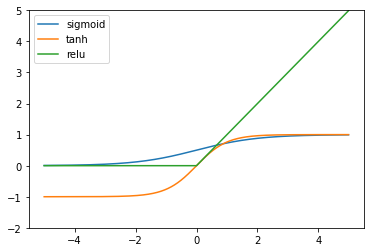

In [312]:
from matplotlib import pyplot as plt
plt.plot(x.cpu().numpy(),s.cpu().numpy())
plt.plot(x.cpu().numpy(),t.cpu().numpy())
plt.plot(x.cpu().numpy(),r.cpu().numpy())
plt.ylim((-2, 5))
plt.legend(["sigmoid", "tanh", "relu"])
plt.show()

Let's practice some more by solving the infamous [XOR problem](https://en.wikipedia.org/wiki/Exclusive_or) with a small deep network. 

In [11]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], device=device, dtype=torch.float)
Y = torch.tensor([0, 1, 1, 0], device=device, dtype=torch.float)

Use `torch.nn.Sequential` to create a minimal deep network with 1 output dimension and 2 intermediate dimensions. Use ReLU as your intermediate layer activation. 

Picturing the problem as a classification over two classes, select an appropriate output activation and loss function (refer to the cheatsheet for aid).

In [148]:
f = torch.nn.Sequential(
    torch.nn.Linear(8, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 4),
    torch.nn.Sigmoid()
).to(device)


loss_fn = torch.nn.MSELoss()
X = X.squeeze(0)
X = X.flatten()
print(X.shape)
print(f(X))
predi = f(X)
loss_fn = loss_fn(predi,Y)

def loss_(predicted, y):
    print(predicted.shape, y.shape)
    #assert y.shape[1] == predicted[0].shape #  assert A.shape[1] == B.shape[0]
    loss = torch.sum(((y-predicted.T)**2))
    return loss /len(y)

loss_fun_2 = loss_(predi, Y)
print(f"mine: { loss_fun_2}"  )

print(loss_fn)

torch.Size([8])
tensor([0.4317, 0.5223, 0.5223, 0.5425], grad_fn=<SigmoidBackward>)
torch.Size([4]) torch.Size([4])
mine: 0.23424406349658966
tensor(0.2342, grad_fn=<MseLossBackward>)


Instantiate an optimizer for your network.

Perform 5000 iterations of training, printing the loss as you go.

In [149]:
opt = torch.optim.Adam(f.parameters())  # initiate optimizer
opt.Parameter  = X
opt.amsgrad = True
loss_fn = torch.nn.MSELoss()
for t in range(5001):  # iterate
    P = f(X)  # predict 
    loss_ = loss_fn(P, Y)   # compute loss
    if t ==0:
        loss_.backward(retain_graph=True)  # backpropagate 
    else:
        loss_.backward()
        opt.step()  # optimize
        opt.zero_grad()  # reset gradients


    if t % 500 == 0:
        print("Iteration {} loss: {}".format(t, loss_.item()))
        
        
        


Iteration 0 loss: 0.23424406349658966
Iteration 500 loss: 2.2459022147813812e-05
Iteration 1000 loss: 5.67132656215108e-06
Iteration 1500 loss: 2.107220325342496e-06
Iteration 2000 loss: 6.54500240671041e-07
Iteration 2500 loss: 2.4576038981649617e-07
Iteration 3000 loss: 1.1520965870204236e-07
Iteration 3500 loss: 6.223311288522382e-08
Iteration 4000 loss: 3.6780864576257954e-08
Iteration 4500 loss: 2.3109290481215794e-08
Iteration 5000 loss: 1.5160022570626097e-08


You might encounter a shape error here. If you do, don't panic! Read it, understand what the problem is and remember `.view()`.

Is the loss improving? If not, try toying around with the intermediate layer's width, the optimizer and its learning rate until your network can solve the problem.

Check what the trained network now predicts on our input data. Is that what we would expect here?

In [150]:
f(X)

tensor([1.9919e-04, 9.9991e-01, 9.9988e-01, 9.1921e-06],
       grad_fn=<SigmoidBackward>)

In [151]:
del f, loss_fn, opt, X, Y

<a id='3d'></a>
## 4. Putting Everything Together
Time to hone our newly acquired torch skills! 

We will now put everything together and write an actual network on a real task. The code below is mostly complete, but some parts here and there are missing. You will be asked to fill those in, so pay attention!

First, construct a two-layer network that implements the function $f: \mathbb{R}^{300} \to \mathbb{R}$, such that:

$f(x) = W_2(ReLU(W_1x + \beta_1) + \beta_2$

where:
* $W_1 \in \mathbb{R}^{100, 300}$
* $W_2 \in \mathbb{R}^{1, 100}$ 
* $ \beta_1 \in \mathbb{R}^{100}$ 
* $\beta_2 \in \mathbb{R}^1$


using `torch.nn.Sequential` 

In [5]:
f = torch.nn.Sequential(
    torch.nn.Linear(300,100, bias =True),
    torch.nn.ReLU(), # I am not sure how to add the Betas
    torch.nn.Linear(100,1,bias =True),
    torch.nn.Sigmoid(), # I am not sure how to add the Betas
).to(device)

Let's make some use of this network on real data.
We are going to open a data dump containing ~5500 baby names. Each name is associated with a label (either 0 for male, or 1 for female), and also a 300-dimensional vector. Representing words as dense vectors is standard practice in NLP; you will learn more about these vectors in your first assignment. For now, we will simply use them in an attempt to teach the network to distinguish between boy and girl babies given their names, while writing some useful code in the process. 👶 🍼

In [ ]:
import pickle
with open("name_data.p", "rb") as fh:
    names, vectors, labels = pickle.load(fh)

What does our data look like? Run the snippet below a couple of times to get an impression.

In [ ]:
print(np.random.permutation(list(zip(names, labels)))[0:20])

`vectors` is a list of numpy arrays, and `labels` is a list of integers. We will need to convert them to lists of FloatTensors. Since that is a lot of data, it is unlikely for them to all fit in the GPU, so we will use the RAM as a temporary storage regardless of your currently used device.

In [ ]:
# or alternatively, vectors = [torch.tensor(vector) for vector in vectors]
vectors = list(map(lambda x: torch.tensor(x, dtype=torch.float), vectors))
labels = list(map(lambda x: torch.tensor(x, dtype=torch.float), labels))  

Training on your entire dataset is bad practice; we should split the data into a training set and a validation set. We could either do it manually, or let `sklearn` do it for us.

In [ ]:
from sklearn.model_selection import train_test_split
names_train, names_val, X_train, X_val, Y_train, Y_val = train_test_split(names, vectors, labels, test_size=0.2)
assert len(X_train) == len(Y_train) == len(names_train)
assert len(X_val) == len(Y_val) == len(names_val)

Now that we have split the data, we may convert them from a list of tensors into a big tensor. We could do that by using `view()` to expand the first dimension of each vector and then `cat()` to merge them, but an easier solution is `stack()`.

In [ ]:
X_train = torch.stack(X_train)
X_val = torch.stack(X_val)
Y_train = torch.tensor(Y_train)
Y_val = torch.tensor(Y_val)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

Now that we have our tensors in a sensible format, we may construct a Dataset (a storage unit for our data) and a DataLoader (a wrapper responsible for shuffling the data, iterating through it and converting it to batches).

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_dataset = TensorDataset(X_train, Y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = TensorDataset(X_val, Y_val)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)  # no need to shuffle the validation data

Let's begin and immediately stop an iteration through the training dataloader to get an idea of what's going on.

In [ ]:
for batch_x, batch_y in train_dataloader:
    print(batch_x.shape)
    print(batch_x.dtype)
    print(batch_y.shape)
    print(batch_y.dtype)
    break

Looking good; batch_x is 32 300-dimensional vectors, and batch_y is 32 values.

`train_batch()` is a function that takes a network, a batch of inputs, a batch of outputs, a loss function and an optimizer, runs the training routine on that batch and returns the loss value of that batch.

In [ ]:
from typing import Callable, List

# Callable is typed as Callable[[i1, i2, ..], o]
# where i1, i2, .. are the input types and o is the output type.

def train_batch(
    network: torch.nn.Module,  # the network
    X_batch: torch.FloatTensor,  # the X batch
    Y_batch: torch.LongTensor,   # the Y batch
    # a function from a FloatTensor (prediction) and a FloatTensor (Y) to a FloatTensor (the loss)
    loss_fn: Callable[[torch.FloatTensor, torch.FloatTensor], torch.FloatTensor],  
    # the optimizer
    optimizer: torch.optim.Optimizer
) -> float:
    # Set the training mode.
    network.train()
    # Train.
    prediction_batch = network(X_batch)  # forward pass
    batch_loss = loss_fn(prediction_batch.view(-1), Y_batch)  # loss calculation
    batch_loss.backward()  # gradient computation
    optimizer.step()  # back-propagation
    optimizer.zero_grad()  # gradient reset
    return batch_loss.item()

<div class="alert alert-block alert-info">
<b>Note:</b> Several network components (e.g. dropout units) may behave differently during training and validation. We use `.train()` to inform the network that we are in training time.
</div>

<div class="alert alert-block alert-warning">
<b>Warning:</b>
The `batch_loss` tensor requires gradient (why?). It is important to return its contents with `.item()` rather than the tensor itself, otherwise we risk memory leak because of the accumulated gradient tracking.
</div>

`train_epoch()` is a function that takes a network, the training dataloader, a loss function and an optimizer. It iterates through the dataloader and is responsible for calling `train_batch()`.

In [ ]:
def train_epoch(
    network: torch.nn.Module, 
    dataloader: DataLoader,
    loss_fn: Callable[[torch.FloatTensor, torch.FloatTensor], torch.FloatTensor],
    optimizer: torch.optim.Optimizer, 
    device: str
) -> float:
    # Set the initial loss value.
    loss = 0.
    # Iterate over the batches in the dataloader.
    for i, (x_batch, y_batch) in enumerate(dataloader):
        x_batch = x_batch.to(device)  # convert back to your chosen device
        y_batch = y_batch.to(device)
        loss += train_batch(
            network=network, X_batch=x_batch, Y_batch=y_batch, loss_fn=loss_fn, optimizer=optimizer
        )
    loss /= (i+1) # divide the loss by the number of batches for consistency 
    return loss

Your turn; fill in the missing parts of `eval_batch()`, a function that takes a network, a batch of inputs, a batch of outputs and a loss function, and computes the loss of that batch.

In [ ]:
def eval_batch(
    network: torch.nn.Module,  # the network
    X_batch: torch.FloatTensor,  # the X batch
    Y_batch: torch.LongTensor,   # the Y batch
    loss_fn: Callable[[torch.FloatTensor, torch.LongTensor], torch.FloatTensor]
) -> float:
    # Set the evaluation mode.
    network.eval()
    #
    with torch.no_grad():
        loss_ =loss_fn( network(X_batch),Y_batch)
    return loss_

<div class="alert alert-block alert-info">
<b>Note:</b> Notice that we use `.eval()` to inform the network we are in validation time. Notice also the `no_grad()` context; this is telling torch that it doesn't need to bother with gradient tracking momentarily, providing a significant speed-up for the current session.
</div>

`eval_epoch()` is basically the same as `train_epoch()`, aside from the lack of an optimizer. Fill it in.

In [ ]:
def eval_epoch(
    network: torch.nn.Module, 
    dataloader: DataLoader,
    loss_fn: Callable[[torch.FloatTensor, torch.LongTensor], torch.FloatTensor],
    device: str
) -> float:
    NotImplemented

We can also make an auxilliary `infer_batch()` function; the forward pass gives us the final layer's output, but we might be more interested in the predicted class rather than its probability.

In [ ]:
def infer_batch(
    network: torch.nn.Module, 
    batch_x: torch.FloatTensor, 
    device: str
) -> torch.LongTensor:
    # First apply the sigmoid activation 
    # (since it is implemented by the loss function rather than the network itself).
    sigm = torch.sigmoid(network(batch_x.to(device)))
    # Round the result.
    classes = torch.round(sigm)
    # Detach it from the computation graph (we no longer care about its gradients).
    classes = classes.detach()
    # Cast the result into a LongTensor and return.
    return classes.to(torch.long)

One last thing before we can finally train; we need a loss function and an optimizer. 

In [ ]:
opt = torch.optim.Adam(f.parameters(), lr=1e-05)
loss_fn = torch.nn.BCEWithLogitsLoss(reduction="mean")

In [ ]:
NUM_EPOCHS = 100

train_losses = []
val_losses = []

for t in range(NUM_EPOCHS):
    train_loss = train_epoch(f, train_dataloader, optimizer=opt, loss_fn=loss_fn, device=device)
    val_loss = eval_epoch(f, val_dataloader, loss_fn, device=device)
    
    print("Epoch {}".format(t))
    print(" Training Loss: {}".format(train_loss))
    print(" Validation Loss: {}".format(val_loss))
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

We may plot the losses to get an idea of what the learning curve looks like.

In [ ]:
from matplotlib import pyplot as plt
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(["Training", "Validation"])
plt.show()

And let's bring this to an end by labeling all of our validation data and printing the results.

In [ ]:
predictions = []

for x_batch, _ in val_dataloader:
    p_batch = infer_batch(f, x_batch, device).cpu().numpy().tolist()
    predictions.extend(p_batch)
    
from pprint import pprint
pprint(list(zip(names_val, predictions)))

Very convincing! What are these word vectors and how are they helping our network predict baby genders?  🤔

Do the first assignment and find out!

---